# Importing Dependencies and Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
TRAIN_DIR = '/kaggle/input/facial-expression-dataset/train/train'
TEST_DIR = '/kaggle/input/facial-expression-dataset/test/test'

In [3]:
import os
print(os.path.exists(TRAIN_DIR))  # Should return True
print(os.listdir(TRAIN_DIR))  # Should list subdirectories (labels)

True
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [4]:
import os

def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)  # Ensure correct path
        
        if os.path.isdir(label_path):  # Check if it's a directory
            for filename in os.listdir(label_path):  # Use os.path.join correctly
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)

            print(label, "Completed")

    return image_paths, labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


In [6]:
# shuffling images in dataset for training
train = train.sample(frac=1).reset_index(drop=True)

In [7]:
train.head()

,image,label
0,/kaggle/input/facial-expression-dataset/train/...,fear
1,/kaggle/input/facial-expression-dataset/train/...,neutral
2,/kaggle/input/facial-expression-dataset/train/...,sad
3,/kaggle/input/facial-expression-dataset/train/...,sad
4,/kaggle/input/facial-expression-dataset/train/...,fear


In [8]:
#same process for test set
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/test/t...,surprise
1,/kaggle/input/facial-expression-dataset/test/t...,surprise
2,/kaggle/input/facial-expression-dataset/test/t...,surprise
3,/kaggle/input/facial-expression-dataset/test/t...,surprise
4,/kaggle/input/facial-expression-dataset/test/t...,surprise


# Exploratory Data Analysis

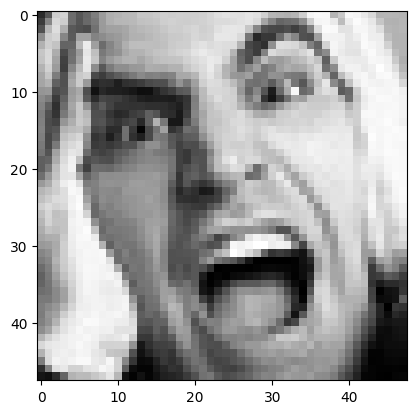

In [9]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

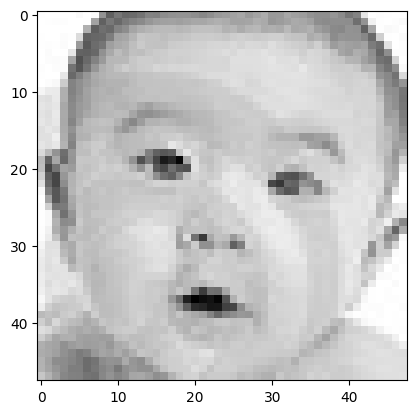

In [10]:
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='gray');

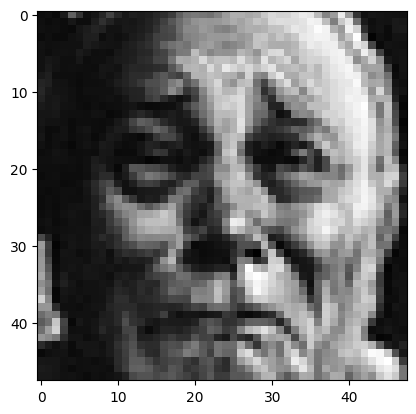

In [11]:
from PIL import Image
img = Image.open(train['image'][2])
plt.imshow(img, cmap='gray');

In [12]:
#function to convert image to array then 
#append all images to features array
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
train_features = extract_features(train['image'])

In [27]:
test_features = extract_features(test['image'])

In [15]:
#normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
#convert categories to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [18]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.])

In [19]:
input_shape = (48, 48, 1)
output_class = 7

# Model

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.2417 - loss: 1.8358 - val_accuracy: 0.2471 - val_loss: 1.8144
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2510 - loss: 1.8116 - val_accuracy: 0.2551 - val_loss: 1.7910
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.2624 - loss: 1.7698 - val_accuracy: 0.3087 - val_loss: 1.6625
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.3231 - loss: 1.6695 - val_accuracy: 0.4231 - val_loss: 1.5010
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.3931 - loss: 1.5511 - val_accuracy: 0.4557 - val_loss: 1.4009
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4285 - loss: 1.4782 - val_accuracy: 0.4745 - val_loss: 1.3433
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4541 - loss: 1.4237 - val_accuracy: 0.4907 - val_loss: 1.3018
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.4732 - loss: 1.3679 - 

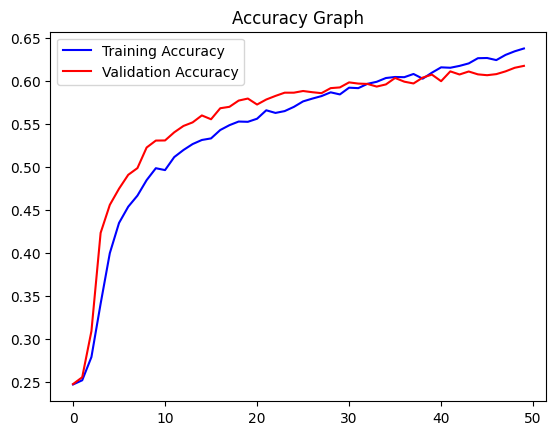

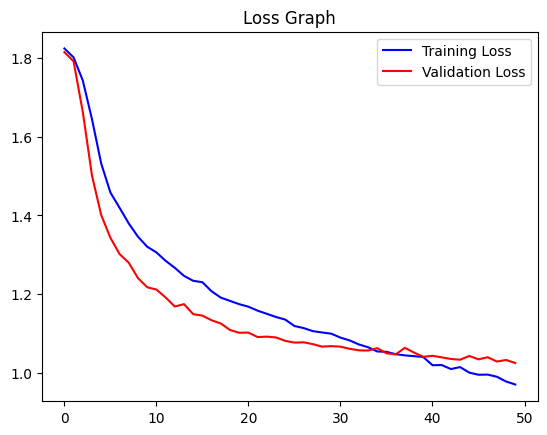

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
Predicted Output: neutral


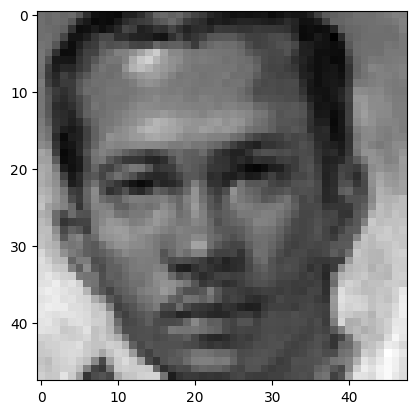

In [23]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Output: happy


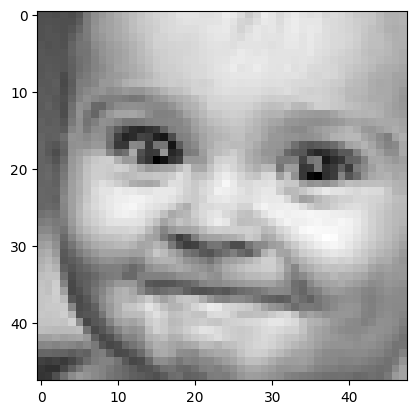

In [24]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Output: fear


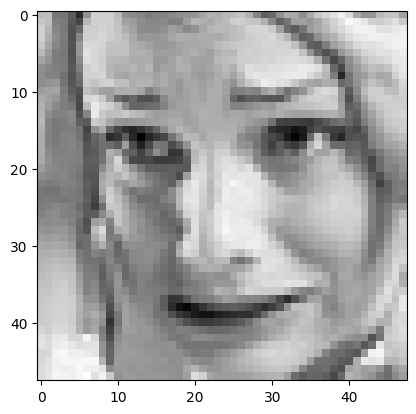

In [30]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

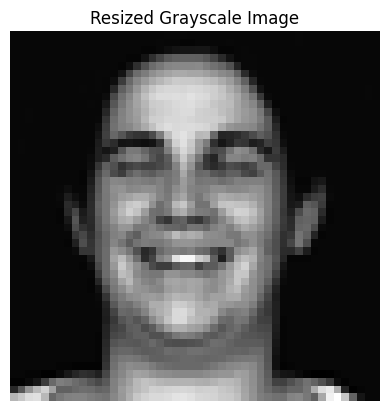

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
img_path = "/kaggle/input/grayscaleimage/Example-of-gray-scale-image.png"
img = Image.open(img_path).convert('L')  # Convert to grayscale
img_resized = img.resize((48, 48))       # Resize to 48x48

# Display the image
plt.imshow(img_resized, cmap='gray')
plt.axis('off')
plt.title("Resized Grayscale Image")
plt.show()

# Convert to numpy array and normalize
img_array = np.array(img_resized) / 255.0
img_array = img_array.reshape(1, 48, 48, 1)  # Add batch and channel dimensions

In [36]:
# Predict using your trained model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print("Predicted Class Index:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class Index: 3


In [37]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Predict using your model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print label instead of index
print("Predicted Emotion:", emotion_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Emotion: Happy
